In [1]:
# generic data science libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

# Gather data and Data Cleaning

In [3]:
#Input Mojo_budget_updata.csv file
mojo_upd_df = pd.read_csv('../Resources/Mojo_budget_update.csv')

In [4]:
#Information about the data
mojo_upd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3243 entries, 0 to 3242
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3243 non-null   object 
 1   title            3243 non-null   object 
 2   year             3243 non-null   int64  
 3   trivia           3243 non-null   object 
 4   mpaa             3082 non-null   object 
 5   release_date     3242 non-null   object 
 6   run_time         3243 non-null   object 
 7   distributor      3228 non-null   object 
 8   director         3243 non-null   object 
 9   writer           3234 non-null   object 
 10  producer         3230 non-null   object 
 11  composer         3138 non-null   object 
 12  cinematographer  3129 non-null   object 
 13  main_actor_1     3243 non-null   object 
 14  main_actor_2     3243 non-null   object 
 15  main_actor_3     3243 non-null   object 
 16  main_actor_4     3240 non-null   object 
 17  budget        

In [5]:
mojo_upd_df = mojo_upd_df.loc[pd.notnull(mojo_upd_df["release_date"])].reset_index(drop=True)


In [6]:
mojo_upd_df = mojo_upd_df.loc[pd.notnull(mojo_upd_df["mpaa"])].reset_index(drop=True)

In [7]:
mojo_upd_df = mojo_upd_df.drop(["distributor","writer","producer","composer","cinematographer","international","worldwide","genre_2","genre_3","genre_4","trivia","html"],axis=1)


In [8]:
mojo_upd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      3081 non-null   object 
 1   title         3081 non-null   object 
 2   year          3081 non-null   int64  
 3   mpaa          3081 non-null   object 
 4   release_date  3081 non-null   object 
 5   run_time      3081 non-null   object 
 6   director      3081 non-null   object 
 7   main_actor_1  3081 non-null   object 
 8   main_actor_2  3081 non-null   object 
 9   main_actor_3  3081 non-null   object 
 10  main_actor_4  3079 non-null   object 
 11  budget        3081 non-null   float64
 12  domestic      3070 non-null   float64
 13  genre_1       3081 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 337.1+ KB


In [9]:
mojo_upd_df = mojo_upd_df.loc[pd.notnull(mojo_upd_df["domestic"])].reset_index(drop=True)

In [10]:
mojo_upd_df = mojo_upd_df.loc[pd.notnull(mojo_upd_df["main_actor_4"])].reset_index(drop=True)

In [11]:
mojo_upd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      3068 non-null   object 
 1   title         3068 non-null   object 
 2   year          3068 non-null   int64  
 3   mpaa          3068 non-null   object 
 4   release_date  3068 non-null   object 
 5   run_time      3068 non-null   object 
 6   director      3068 non-null   object 
 7   main_actor_1  3068 non-null   object 
 8   main_actor_2  3068 non-null   object 
 9   main_actor_3  3068 non-null   object 
 10  main_actor_4  3068 non-null   object 
 11  budget        3068 non-null   float64
 12  domestic      3068 non-null   float64
 13  genre_1       3068 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 335.7+ KB


In [12]:
mojo_upd_df.head()

,movie_id,title,year,mpaa,release_date,run_time,director,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,genre_1
0,tt0099165,The Bonfire of the Vanities,1990,R,December 22,2 hr 5 min,Brian De Palma,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,47000000.0,15691192.0,Comedy
1,tt0099611,Frankenhooker,1990,R,June 1,1 hr 25 min,Frank Henenlotter,James Lorinz,Joanne Ritchie,Patty Mullen,J.J. Clark,2500000.0,205068.0,Comedy
2,tt0099674,The Godfather: Part III,1990,R,December 25,2 hr 42 min,Francis Ford Coppola,Al Pacino,Diane Keaton,Andy Garcia,Talia Shire,54000000.0,66666062.0,Crime
3,tt0099747,Havana,1990,R,December 14,2 hr 24 min,Sydney Pollack,Robert Redford,Lena Olin,Alan Arkin,Tomas Milian,40000000.0,9243140.0,Drama
4,tt0100029,Lionheart,1990,R,January 11,1 hr 48 min,Sheldon Lettich,Jean-Claude Van Damme,Harrison Page,Deborah Rennard,Lisa Pelikan,6000000.0,24078196.0,Action


In [13]:
mojo_upd_df.columns


Index(['movie_id', 'title', 'year', 'mpaa', 'release_date', 'run_time',
       'director', 'main_actor_1', 'main_actor_2', 'main_actor_3',
       'main_actor_4', 'budget', 'domestic', 'genre_1'],
      dtype='object')

In [14]:
mojo_upd_df.run_time.value_counts()

1 hr 41 min    92
1 hr 30 min    87
1 hr 40 min    81
1 hr 38 min    80
1 hr 49 min    79
1 hr 46 min    77
1 hr 37 min    77
1 hr 35 min    75
1 hr 44 min    75
1 hr 39 min    75
1 hr 45 min    73
1 hr 47 min    72
1 hr 36 min    72
1 hr 48 min    66
1 hr 42 min    65
1 hr 34 min    65
1 hr 31 min    64
1 hr 32 min    64
1 hr 33 min    62
1 hr 50 min    60
1 hr 29 min    57
1 hr 58 min    57
1 hr 43 min    56
1 hr 56 min    56
1 hr 28 min    56
1 hr 53 min    56
1 hr 55 min    54
1 hr 57 min    51
1 hr 52 min    50
1 hr 51 min    50
2 hr 4 min     50
2 hr 3 min     45
1 hr 59 min    44
2 hr 2 min     43
1 hr 26 min    43
2 hr           42
1 hr 54 min    40
1 hr 27 min    40
2 hr 1 min     37
2 hr 8 min     35
2 hr 5 min     33
2 hr 10 min    32
2 hr 7 min     29
1 hr 24 min    27
2 hr 12 min    26
2 hr 9 min     25
2 hr 15 min    25
1 hr 25 min    25
2 hr 6 min     24
2 hr 11 min    24
1 hr 23 min    22
2 hr 13 min    21
1 hr 21 min    20
2 hr 16 min    18
2 hr 14 min    18
2 hr 18 mi

In [15]:
#Convert run_time in to minutes
times = []

for index,row in mojo_upd_df.iterrows():
    vals = row.run_time.split(" ")
    if len(vals)>2:
        run_time = int(vals[0])*60 + int(vals[2])    
    else:
        run_time = int(vals[0])*60
    times.append(run_time)

mojo_upd_df["runtime_conv"] = times    

In [16]:
mojo_genre_runtime = mojo_upd_df.groupby("genre_1").runtime_conv.mean()
mojo_genre_runtime

genre_1
Action         112.985393
Adventure      103.168459
Animation       88.545455
Biography      123.445714
Comedy         102.736330
Crime          113.814433
Documentary     97.857143
Drama          115.224280
Family         118.000000
Fantasy        103.500000
Horror          97.880503
Music           93.000000
Mystery        118.222222
Romance        106.000000
Sci-Fi          96.333333
Name: runtime_conv, dtype: float64

Text(0, 0.5, 'Title Count')

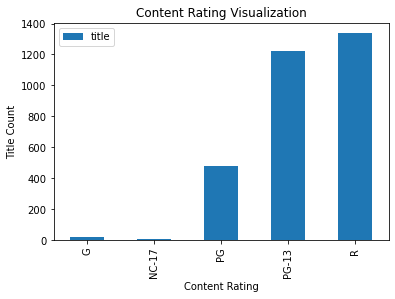

In [17]:
# using the visualization to display content rating vs movie title
mojo_upd_df[['mpaa','title']].groupby('mpaa').count().plot(kind='bar', title='Content Rating Visualization')
plt.xlabel('Content Rating')
plt.ylabel('Title Count')

In [18]:
mojo_upd_df.head()

,movie_id,title,year,mpaa,release_date,run_time,director,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,genre_1,runtime_conv
0,tt0099165,The Bonfire of the Vanities,1990,R,December 22,2 hr 5 min,Brian De Palma,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,47000000.0,15691192.0,Comedy,125
1,tt0099611,Frankenhooker,1990,R,June 1,1 hr 25 min,Frank Henenlotter,James Lorinz,Joanne Ritchie,Patty Mullen,J.J. Clark,2500000.0,205068.0,Comedy,85
2,tt0099674,The Godfather: Part III,1990,R,December 25,2 hr 42 min,Francis Ford Coppola,Al Pacino,Diane Keaton,Andy Garcia,Talia Shire,54000000.0,66666062.0,Crime,162
3,tt0099747,Havana,1990,R,December 14,2 hr 24 min,Sydney Pollack,Robert Redford,Lena Olin,Alan Arkin,Tomas Milian,40000000.0,9243140.0,Drama,144
4,tt0100029,Lionheart,1990,R,January 11,1 hr 48 min,Sheldon Lettich,Jean-Claude Van Damme,Harrison Page,Deborah Rennard,Lisa Pelikan,6000000.0,24078196.0,Action,108


<AxesSubplot:title={'center':'runtime_conv'}, xlabel='mpaa'>

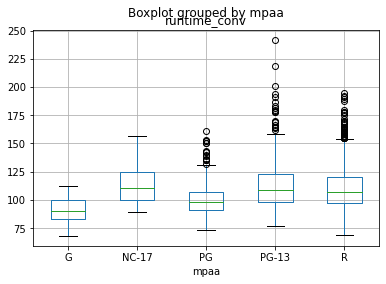

In [19]:
# visualize the relationship between content rating and runtime
mojo_upd_df.boxplot(column ='runtime_conv', by='mpaa')

In [20]:
mojo_genre_domestic = mojo_upd_df.groupby("genre_1").domestic.mean()
mojo_genre_domestic

genre_1
Action         9.064102e+07
Adventure      1.017076e+08
Animation      1.102304e+08
Biography      4.478447e+07
Comedy         4.436525e+07
Crime          3.593132e+07
Documentary    1.774618e+07
Drama          3.692123e+07
Family         2.572131e+08
Fantasy        5.501974e+07
Horror         4.557892e+07
Music          3.419967e+06
Mystery        5.913286e+07
Romance        6.249564e+07
Sci-Fi         3.151592e+07
Name: domestic, dtype: float64

Text(0.5, 1.0, 'Most Common Movie Genres')

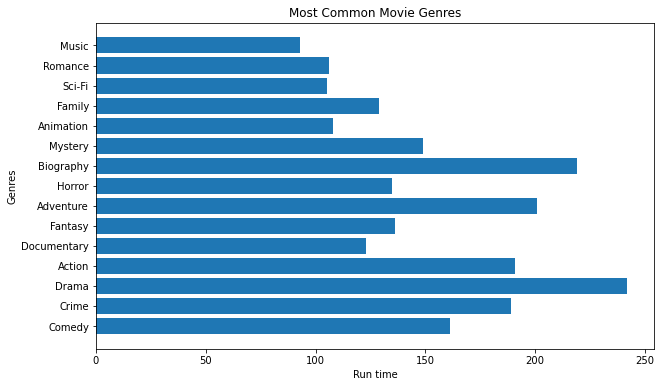

In [21]:
x = mojo_upd_df['genre_1']
y = mojo_upd_df['runtime_conv']
import matplotlib.pyplot as plt

#create a figure with large width to display all genres clearly
plt.figure(figsize = (10,6))
#make a bar plot on the figure
plt.barh(x, y)
#label the axes, title, and ticks
plt.xlabel('Run time')
plt.ylabel('Genres')
plt.title('Most Common Movie Genres')

In [22]:
#Combining release date and year

# mojo_upd_df["full_date"] = mojo_upd_df["release_date"]+ str(mojo_upd_df["year"])


full_date = []

for index,row in mojo_upd_df.iterrows():
    vals = str(row["release_date"]) + " " + str(row["year"])
    full_date.append(vals)

mojo_upd_df["full_date"] = full_date   
mojo_upd_df["full_date"] = pd.to_datetime(mojo_upd_df["full_date"])                    
mojo_upd_df.head()

,movie_id,title,year,mpaa,release_date,run_time,director,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,genre_1,runtime_conv,full_date
0,tt0099165,The Bonfire of the Vanities,1990,R,December 22,2 hr 5 min,Brian De Palma,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,47000000.0,15691192.0,Comedy,125,1990-12-22
1,tt0099611,Frankenhooker,1990,R,June 1,1 hr 25 min,Frank Henenlotter,James Lorinz,Joanne Ritchie,Patty Mullen,J.J. Clark,2500000.0,205068.0,Comedy,85,1990-06-01
2,tt0099674,The Godfather: Part III,1990,R,December 25,2 hr 42 min,Francis Ford Coppola,Al Pacino,Diane Keaton,Andy Garcia,Talia Shire,54000000.0,66666062.0,Crime,162,1990-12-25
3,tt0099747,Havana,1990,R,December 14,2 hr 24 min,Sydney Pollack,Robert Redford,Lena Olin,Alan Arkin,Tomas Milian,40000000.0,9243140.0,Drama,144,1990-12-14
4,tt0100029,Lionheart,1990,R,January 11,1 hr 48 min,Sheldon Lettich,Jean-Claude Van Damme,Harrison Page,Deborah Rennard,Lisa Pelikan,6000000.0,24078196.0,Action,108,1990-01-11


In [23]:
mojo_upd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_id      3068 non-null   object        
 1   title         3068 non-null   object        
 2   year          3068 non-null   int64         
 3   mpaa          3068 non-null   object        
 4   release_date  3068 non-null   object        
 5   run_time      3068 non-null   object        
 6   director      3068 non-null   object        
 7   main_actor_1  3068 non-null   object        
 8   main_actor_2  3068 non-null   object        
 9   main_actor_3  3068 non-null   object        
 10  main_actor_4  3068 non-null   object        
 11  budget        3068 non-null   float64       
 12  domestic      3068 non-null   float64       
 13  genre_1       3068 non-null   object        
 14  runtime_conv  3068 non-null   int64         
 15  full_date     3068 non-null   datetime

In [24]:
mojo_upd_df = mojo_upd_df.drop(["run_time","release_date"],axis=1)

In [25]:
mojo_upd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_id      3068 non-null   object        
 1   title         3068 non-null   object        
 2   year          3068 non-null   int64         
 3   mpaa          3068 non-null   object        
 4   director      3068 non-null   object        
 5   main_actor_1  3068 non-null   object        
 6   main_actor_2  3068 non-null   object        
 7   main_actor_3  3068 non-null   object        
 8   main_actor_4  3068 non-null   object        
 9   budget        3068 non-null   float64       
 10  domestic      3068 non-null   float64       
 11  genre_1       3068 non-null   object        
 12  runtime_conv  3068 non-null   int64         
 13  full_date     3068 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 335.7+ KB


<AxesSubplot:xlabel='genre_1', ylabel='runtime_conv'>

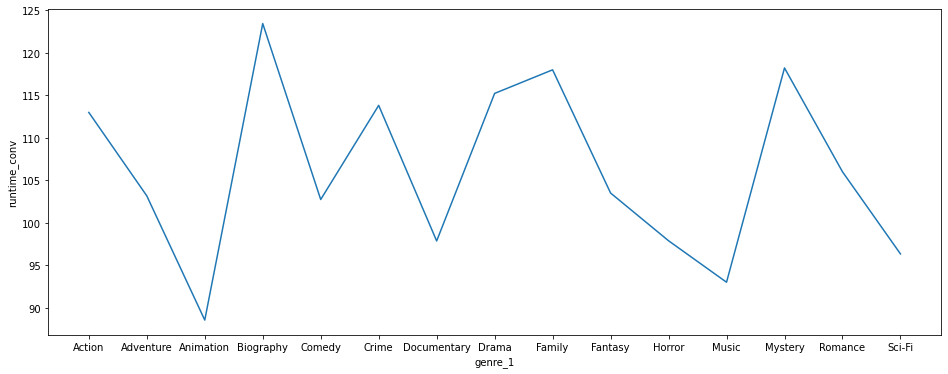

In [26]:
plt.figure(figsize=(16,6))
sns.lineplot(data=mojo_genre_runtime)

Text(0, 0.5, 'Budget')

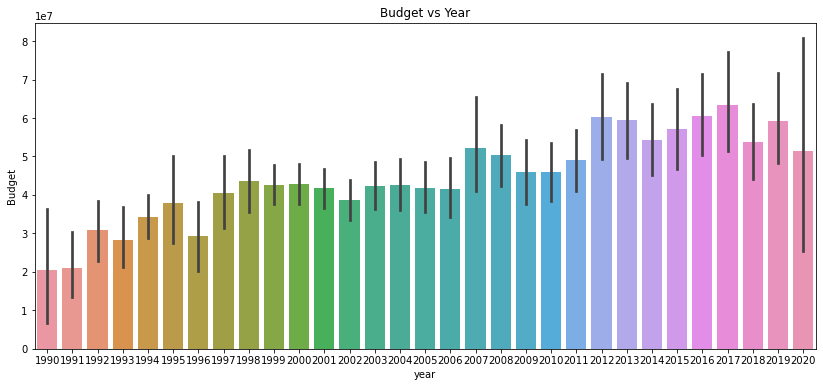

In [27]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Budget vs Year")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=mojo_upd_df["year"], y=mojo_upd_df["budget"])

# Add label for vertical axis
plt.ylabel("Budget")

<AxesSubplot:xlabel='domestic', ylabel='Count'>

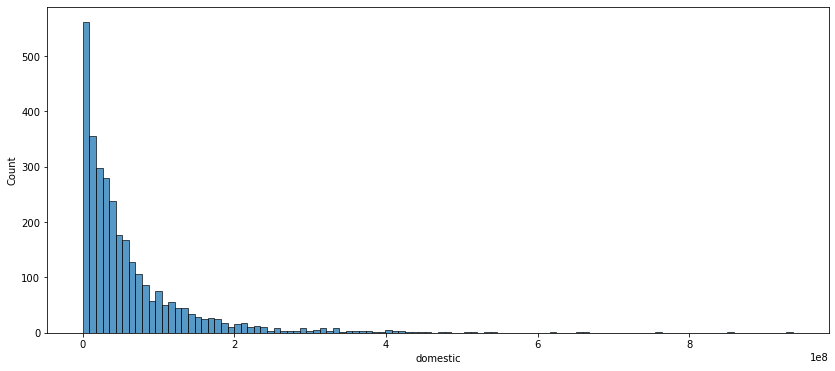

In [28]:
# Histogram 
plt.figure(figsize=(14,6))
sns.histplot(mojo_upd_df['domestic'])

<AxesSubplot:title={'center':'Unique values per feature'}>

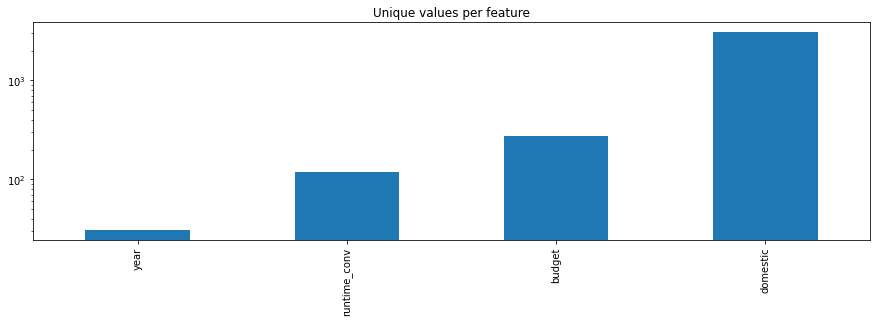

In [29]:
unique_values = mojo_upd_df.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.bar(logy=True,figsize=(15,4),title = "Unique values per feature")

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='runtime_conv'>

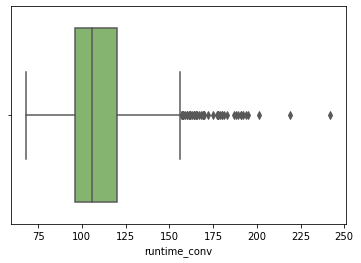

In [30]:
sns.boxplot(mojo_upd_df['runtime_conv'], palette='summer')

<AxesSubplot:xlabel='full_date', ylabel='Count'>

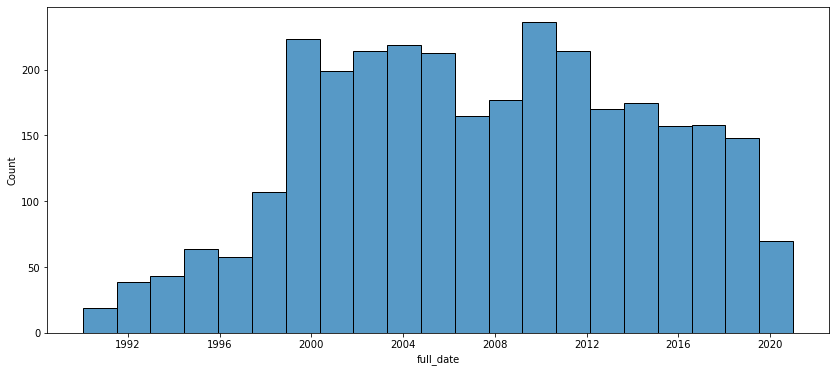

In [31]:
# Histogram 
plt.figure(figsize=(14,6))
sns.histplot(mojo_upd_df['full_date'])

<AxesSubplot:xlabel='genre_1', ylabel='Count'>

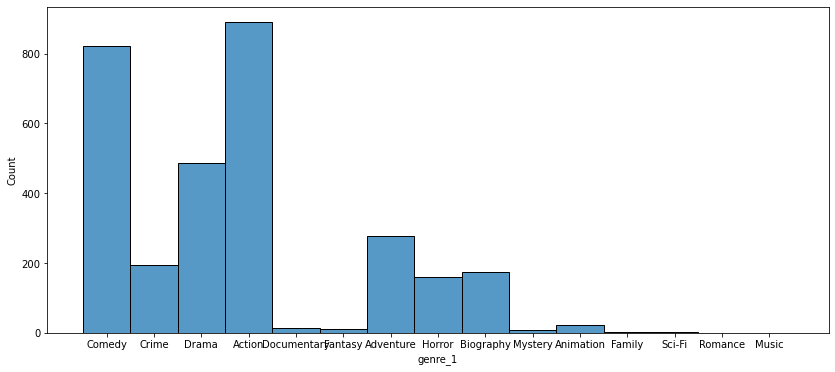

In [32]:
# Histogram 

plt.figure(figsize=(14,6))
sns.histplot(mojo_upd_df['genre_1'])

In [33]:
mojo_upd_df.describe()

,year,budget,domestic,runtime_conv
count,3068.000000,3.068000e+03,3.068000e+03,3068.000000
mean,2006.904824,4.727161e+07,6.192603e+07,109.282595
std,7.074530,4.740497e+07,8.047241e+07,18.465011
min,1990.000000,1.100000e+03,9.040000e+02,68.000000
25%,2001.000000,1.500000e+07,1.386308e+07,96.000000
50%,2007.000000,3.000000e+07,3.590826e+07,106.000000
75%,2013.000000,6.500000e+07,7.714734e+07,120.000000
max,2020.000000,3.560000e+08,9.366622e+08,242.000000


In [34]:
mojo_upd_df.shape

(3068, 14)

In [35]:
mojo_upd_df['title'].nunique()

3047

In [36]:
unique = mojo_upd_df['mpaa'].unique()
unique 

array(['R', 'PG', 'PG-13', 'G', 'NC-17'], dtype=object)

In [37]:
mojo_upd_df.corr()

,year,budget,domestic,runtime_conv
year,1.000000,0.161643,0.162321,0.011313
budget,0.161643,1.000000,0.667288,0.358283
domestic,0.162321,0.667288,1.000000,0.298830
runtime_conv,0.011313,0.358283,0.298830,1.000000


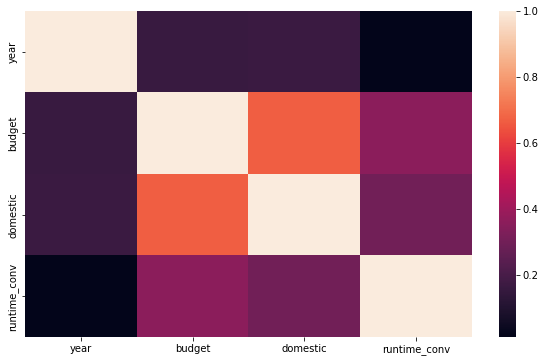

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(mojo_upd_df.corr())
plt.show()

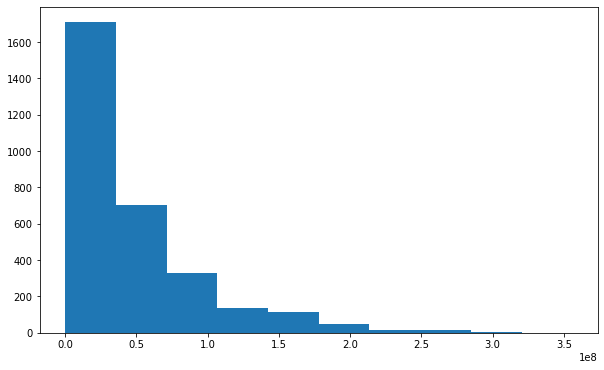

In [39]:
plt.figure(figsize=(10,6))
plt.hist(mojo_upd_df["budget"])
plt.show()

In [40]:
mojo_upd_df  = mojo_upd_df.drop(["year"],axis=1)

In [41]:
mojo_upd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_id      3068 non-null   object        
 1   title         3068 non-null   object        
 2   mpaa          3068 non-null   object        
 3   director      3068 non-null   object        
 4   main_actor_1  3068 non-null   object        
 5   main_actor_2  3068 non-null   object        
 6   main_actor_3  3068 non-null   object        
 7   main_actor_4  3068 non-null   object        
 8   budget        3068 non-null   float64       
 9   domestic      3068 non-null   float64       
 10  genre_1       3068 non-null   object        
 11  runtime_conv  3068 non-null   int64         
 12  full_date     3068 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 311.7+ KB


In [42]:
mojo_upd_df = mojo_upd_df.rename(columns = {'runtime_conv':'runtime','full_date':'release_date'})

In [43]:
mojo_upd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_id      3068 non-null   object        
 1   title         3068 non-null   object        
 2   mpaa          3068 non-null   object        
 3   director      3068 non-null   object        
 4   main_actor_1  3068 non-null   object        
 5   main_actor_2  3068 non-null   object        
 6   main_actor_3  3068 non-null   object        
 7   main_actor_4  3068 non-null   object        
 8   budget        3068 non-null   float64       
 9   domestic      3068 non-null   float64       
 10  genre_1       3068 non-null   object        
 11  runtime       3068 non-null   int64         
 12  release_date  3068 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 311.7+ KB


In [44]:
mojo_upd_df.to_csv("../Resources/cleaned_mojo_budget_upd.csv",index=False)

In [45]:
#Input Mojo_budget_updata.csv file
cleaned_mojo_upd_df = pd.read_csv('../Resources/cleaned_mojo_budget_upd.csv')

In [46]:
cleaned_mojo_upd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      3068 non-null   object 
 1   title         3068 non-null   object 
 2   mpaa          3068 non-null   object 
 3   director      3068 non-null   object 
 4   main_actor_1  3068 non-null   object 
 5   main_actor_2  3068 non-null   object 
 6   main_actor_3  3068 non-null   object 
 7   main_actor_4  3068 non-null   object 
 8   budget        3068 non-null   float64
 9   domestic      3068 non-null   float64
 10  genre_1       3068 non-null   object 
 11  runtime       3068 non-null   int64  
 12  release_date  3068 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 311.7+ KB


In [47]:
cleaned_mojo_upd_df.head()

,movie_id,title,mpaa,director,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,genre_1,runtime,release_date
0,tt0099165,The Bonfire of the Vanities,R,Brian De Palma,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,47000000.0,15691192.0,Comedy,125,1990-12-22
1,tt0099611,Frankenhooker,R,Frank Henenlotter,James Lorinz,Joanne Ritchie,Patty Mullen,J.J. Clark,2500000.0,205068.0,Comedy,85,1990-06-01
2,tt0099674,The Godfather: Part III,R,Francis Ford Coppola,Al Pacino,Diane Keaton,Andy Garcia,Talia Shire,54000000.0,66666062.0,Crime,162,1990-12-25
3,tt0099747,Havana,R,Sydney Pollack,Robert Redford,Lena Olin,Alan Arkin,Tomas Milian,40000000.0,9243140.0,Drama,144,1990-12-14
4,tt0100029,Lionheart,R,Sheldon Lettich,Jean-Claude Van Damme,Harrison Page,Deborah Rennard,Lisa Pelikan,6000000.0,24078196.0,Action,108,1990-01-11
